In [25]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')

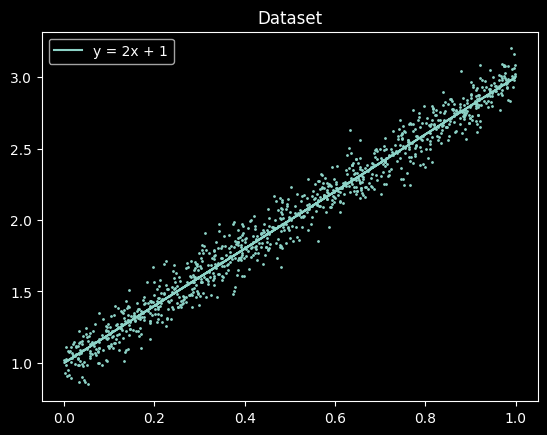

In [26]:
f = lambda x: x*2.0 + 1.0

xs = np.random.rand(1000, 1)   # 1000 points
ys = f(xs) + 0.1*np.random.randn(1000, 1)

plt.title("Dataset")
plt.scatter(xs, ys, s=1)
plt.plot(xs, f(xs), label=f"y = 2x + 1")
plt.legend()
plt.show()

In [27]:
from nn.linear import LinearModel
from nn.cost import MSE

In [28]:
lin = LinearModel(0,0)

In [29]:
lin.a, lin.b

(0, 0)

In [30]:
mse = MSE()

In [31]:
history = [{'w':lin.a, 'b':lin.b}]

for i in range(200):
  y_hat = lin.forward(xs)
  loss = mse.forward(y_hat, ys)
  print(f"Epoch {i+1}: {loss=:.4f}")
  lin.backward(mse.backward())
  lin.update(0.2)
  history.append({'w':lin.a, 'b':lin.b})

Epoch 1: loss=4.3460
Epoch 2: loss=1.1480
Epoch 3: loss=0.3633
Epoch 4: loss=0.1679
Epoch 5: loss=0.1164
Epoch 6: loss=0.1003
Epoch 7: loss=0.0930
Epoch 8: loss=0.0881
Epoch 9: loss=0.0839
Epoch 10: loss=0.0800
Epoch 11: loss=0.0763
Epoch 12: loss=0.0728
Epoch 13: loss=0.0695
Epoch 14: loss=0.0664
Epoch 15: loss=0.0635
Epoch 16: loss=0.0607
Epoch 17: loss=0.0580
Epoch 18: loss=0.0555
Epoch 19: loss=0.0531
Epoch 20: loss=0.0509
Epoch 21: loss=0.0488
Epoch 22: loss=0.0467
Epoch 23: loss=0.0448
Epoch 24: loss=0.0430
Epoch 25: loss=0.0413
Epoch 26: loss=0.0396
Epoch 27: loss=0.0381
Epoch 28: loss=0.0366
Epoch 29: loss=0.0352
Epoch 30: loss=0.0339
Epoch 31: loss=0.0326
Epoch 32: loss=0.0314
Epoch 33: loss=0.0303
Epoch 34: loss=0.0292
Epoch 35: loss=0.0282
Epoch 36: loss=0.0273
Epoch 37: loss=0.0264
Epoch 38: loss=0.0255
Epoch 39: loss=0.0247
Epoch 40: loss=0.0239
Epoch 41: loss=0.0232
Epoch 42: loss=0.0225
Epoch 43: loss=0.0218
Epoch 44: loss=0.0212
Epoch 45: loss=0.0206
Epoch 46: loss=0.02

In [32]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame(history, columns=['w','b'])
df = df.set_index(df.index.set_names('epoch')).reset_index()
df0 = df.copy()
df1 = df.copy()
df0['x'] = xs.min()
df1['x'] = xs.max()
df = pd.concat([df0, df1]).reset_index(drop=True)
df['y'] = df.w * df.x + df.b

fig = px.line(df, x='x', y='y', animation_frame="epoch", width=500, height=500)

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 0.1
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 0.1
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['redraw'] = True

fig.add_scatter(x=xs.flatten(), y=ys.flatten(), mode='markers', name='data', marker={'size':2})

for i, frame in enumerate(fig.frames):
    frame['layout']['title_text'] = f"Prediction: y = {history[i]['w']:.4f}x{'' if history[i]['b'] < 0 else '+'}{history[i]['b']:.4f}"

fig.update_layout(template='plotly_dark')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed